# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [2]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

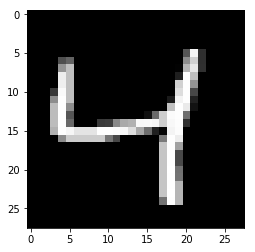

In [4]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [5]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

learning_rate = 0.001

img_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, img_size), name='inputs')
targets_ =  tf.placeholder(tf.float32, (None, img_size), name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs=inputs_, 
                          units=encoding_dim, 
                          activation=tf.nn.relu, 
                          kernel_initializer=tf.random_normal_initializer(stddev=0.1))

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(inputs=encoded, 
                         units=img_size, 
                         activation=None, 
                         kernel_initializer=tf.random_normal_initializer(stddev=0.1))

# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='decoded')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)

# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(learning_rate).minimize(cost)

## Training

In [6]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [7]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.7216
Epoch: 1/20... Training loss: 0.7115
Epoch: 1/20... Training loss: 0.7056
Epoch: 1/20... Training loss: 0.6995
Epoch: 1/20... Training loss: 0.6928
Epoch: 1/20... Training loss: 0.6877
Epoch: 1/20... Training loss: 0.6815
Epoch: 1/20... Training loss: 0.6755
Epoch: 1/20... Training loss: 0.6698
Epoch: 1/20... Training loss: 0.6625
Epoch: 1/20... Training loss: 0.6553
Epoch: 1/20... Training loss: 0.6464
Epoch: 1/20... Training loss: 0.6383
Epoch: 1/20... Training loss: 0.6293
Epoch: 1/20... Training loss: 0.6176
Epoch: 1/20... Training loss: 0.6062
Epoch: 1/20... Training loss: 0.5966
Epoch: 1/20... Training loss: 0.5824
Epoch: 1/20... Training loss: 0.5688
Epoch: 1/20... Training loss: 0.5563
Epoch: 1/20... Training loss: 0.5433
Epoch: 1/20... Training loss: 0.5331
Epoch: 1/20... Training loss: 0.5186
Epoch: 1/20... Training loss: 0.5011
Epoch: 1/20... Training loss: 0.4878
Epoch: 1/20... Training loss: 0.4740
Epoch: 1/20... Training loss: 0.4651
E

Epoch: 2/20... Training loss: 0.1688
Epoch: 2/20... Training loss: 0.1736
Epoch: 2/20... Training loss: 0.1733
Epoch: 2/20... Training loss: 0.1719
Epoch: 2/20... Training loss: 0.1734
Epoch: 2/20... Training loss: 0.1700
Epoch: 2/20... Training loss: 0.1679
Epoch: 2/20... Training loss: 0.1784
Epoch: 2/20... Training loss: 0.1718
Epoch: 2/20... Training loss: 0.1751
Epoch: 2/20... Training loss: 0.1679
Epoch: 2/20... Training loss: 0.1685
Epoch: 2/20... Training loss: 0.1705
Epoch: 2/20... Training loss: 0.1716
Epoch: 2/20... Training loss: 0.1749
Epoch: 2/20... Training loss: 0.1684
Epoch: 2/20... Training loss: 0.1765
Epoch: 2/20... Training loss: 0.1708
Epoch: 2/20... Training loss: 0.1723
Epoch: 2/20... Training loss: 0.1721
Epoch: 2/20... Training loss: 0.1684
Epoch: 2/20... Training loss: 0.1642
Epoch: 2/20... Training loss: 0.1722
Epoch: 2/20... Training loss: 0.1682
Epoch: 2/20... Training loss: 0.1689
Epoch: 2/20... Training loss: 0.1666
Epoch: 2/20... Training loss: 0.1685
E

Epoch: 3/20... Training loss: 0.1441
Epoch: 3/20... Training loss: 0.1385
Epoch: 3/20... Training loss: 0.1332
Epoch: 3/20... Training loss: 0.1416
Epoch: 3/20... Training loss: 0.1367
Epoch: 3/20... Training loss: 0.1422
Epoch: 3/20... Training loss: 0.1320
Epoch: 3/20... Training loss: 0.1402
Epoch: 3/20... Training loss: 0.1413
Epoch: 3/20... Training loss: 0.1397
Epoch: 3/20... Training loss: 0.1363
Epoch: 3/20... Training loss: 0.1447
Epoch: 3/20... Training loss: 0.1461
Epoch: 3/20... Training loss: 0.1349
Epoch: 3/20... Training loss: 0.1393
Epoch: 3/20... Training loss: 0.1338
Epoch: 3/20... Training loss: 0.1375
Epoch: 3/20... Training loss: 0.1396
Epoch: 3/20... Training loss: 0.1398
Epoch: 3/20... Training loss: 0.1373
Epoch: 3/20... Training loss: 0.1457
Epoch: 3/20... Training loss: 0.1408
Epoch: 3/20... Training loss: 0.1381
Epoch: 3/20... Training loss: 0.1413
Epoch: 3/20... Training loss: 0.1421
Epoch: 3/20... Training loss: 0.1315
Epoch: 3/20... Training loss: 0.1355
E

Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1298
Epoch: 4/20... Training loss: 0.1193
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1192
Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1212
Epoch: 4/20... Training loss: 0.1279
Epoch: 4/20... Training loss: 0.1207
Epoch: 4/20... Training loss: 0.1242
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1272
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1158
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1211
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1251
Epoch: 4/20... Training loss: 0.1270
Epoch: 4/20... Training loss: 0.1284
Epoch: 4/20... Training loss: 0.1231
E

Epoch: 5/20... Training loss: 0.1146
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1161
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1147
Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1151
Epoch: 5/20... Training loss: 0.1166
Epoch: 5/20... Training loss: 0.1137
Epoch: 5/20... Training loss: 0.1180
Epoch: 5/20... Training loss: 0.1082
Epoch: 5/20... Training loss: 0.1146
Epoch: 5/20... Training loss: 0.1152
Epoch: 5/20... Training loss: 0.1191
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1152
Epoch: 5/20... Training loss: 0.1132
Epoch: 5/20... Training loss: 0.1125
Epoch: 5/20... Training loss: 0.1144
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1195
Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1124
E

Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1100
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1104
Epoch: 6/20... Training loss: 0.1111
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1081
Epoch: 6/20... Training loss: 0.1101
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1083
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1075
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1078
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1084
Epoch: 6/20... Training loss: 0.1085
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1091
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1026
Epoch: 6/20... Training loss: 0.1047
E

Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.0977
Epoch: 7/20... Training loss: 0.1045
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.0976
Epoch: 7/20... Training loss: 0.0986
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.1035
E

Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0953
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0948
Epoch: 8/20... Training loss: 0.1028
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.1019
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.1011
Epoch: 8/20... Training loss: 0.1029
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0951
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0962
E

Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.1011
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0991
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0936
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0931
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0919
Epoch: 9/20... Training loss: 0.0955
E

Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.1011
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0923
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0917
Epoch: 10/20... Training loss: 0.0921
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0988
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.1000
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.1000
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0994
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0907
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0912
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0983
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0987
Epoch: 12/20... Training loss: 0.0982
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0982
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0977
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0972
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0974
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0915
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0975
Epoch: 13/20... Training loss: 0.0968
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0967
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0906
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0911
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0974
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0974
Epoch: 14/20... Training loss: 0.0908
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0898
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0979
Epoch: 14/20... Training loss: 0.0978
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0907
Epoch: 14/20... Training loss: 0.0972
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0891
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0896
Epoch: 14/20... Training loss: 0.0970
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0972
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0909
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0908
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0902
Epoch: 15/20... Training loss: 0.0985
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0973
Epoch: 16/20... Training loss: 0.0904
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0968
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0980
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20... Training loss: 0.0969
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0904
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0896
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0965
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0899
Epoch: 17/20... Training loss: 0.0903
Epoch: 17/20... Training loss: 0.0897
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0974
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0971
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0903
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0972
Epoch: 18/20... Training loss: 0.0900
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0966
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0885
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0899
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0976
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0960
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0889
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0959
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0906
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0964
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0887
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0965
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0902
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

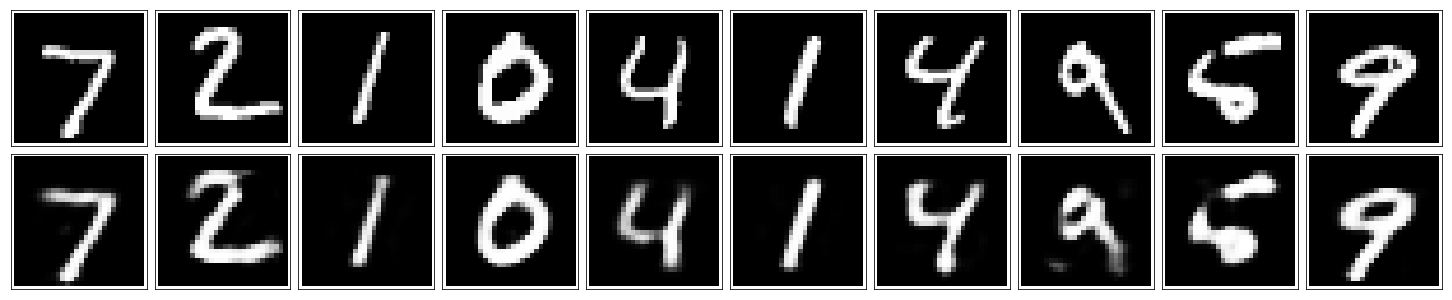

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.